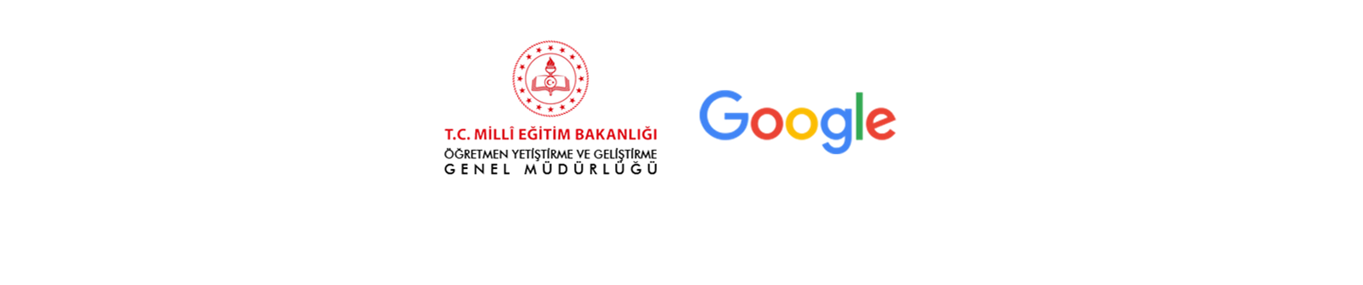

# Yapay Zeka Projeleri
* Günümüzde yapay zeka, sanal asistan veya sohbet robotlarından tarım ve çiftçiliğe, perakende, alışveriş ve moda sektöründen hastalık teşhisine kadar pek çok farklı alanda kullanılıyor.
* Bu bölümde, yapay zeka kursu boyunca öğrendiğimiz bilgileri pekiştireceğimiz ve yapay zeka ile ilgili yeni bilgiler öğreneceğimiz 4 farklı alana ait 4 eğitici proje yapacağız.
* Bu projeler sırasıyla,
    1. Göğüs Kanseri Sınıflandırma
    1. Duygu Analizi
    1. Araçların Yakıt Tüketimi Tahmini
    1. Meyve ve Sebze Sınıflandırma
<br><br>**İçerik:**
* [Göğüs Kanseri Sınıflandırma](#500)
    * [Veri Seti ve Problem Tanımı](#501) 
    * [Veri Seti Yükleme](#502) 
    * [Keşifsel-Açıklayıcı Veri Analizi](#503) 
    * [Aykırı Değer Tespiti ve Çıkarılması](#504) 
    * [Eğitim ve Test Veri Seti Bölünmesi](#505) 
    * [Standardizasyon](#506) 
    * [K-En Yakın Komşu](#507) 
    * [Temel Bileşenler Analizi](#508) 
    * [Komşuluk Bileşenleri Analizi](#509) 
* [Duygu Analizi](#600)
    * [Veri Seti ve Problem Tanımı](#601)    
    * [Keşifsel-Açıklayıcı Veri Analizi](#602) 
    * [Ön İşlem](#603) 
    * [Tekrarlayan Sinir Ağı Oluşturma](#604) 
    * [Tekrarlayan Sinir Ağı Eğitimi](#605) 
    * [Sonuçların Değerlendirilmesi](#606) 
* [Araçların Yakıt Tüketimi Tahmini](#700)
    * [Veri Seti ve Problem Tanımı](#701) 
    * [Kayıp Veri Sorunu](#702)
    * [Keşifsel-Açıklayıcı Veri Analizi](#703)
    * [Aykırı Değer Tespiti ve Çıkarılması](#704)
    * [Öz Nitelik Mühendisliği - Çarpıklık Problemi](#705)
    * [Öz Nitelik Mühendisliği - Kodlama](#706)
    * [Ön İşlem](#707)
    * [Doğrusal Regresyon](#708)
    * [Ridge Regression](#709)
    * [Lasso Regression](#710)
    * [Elastik Ağ](#711)
* [Meyve ve Sebze Sınıflandırma](#800)
    * [Veri Seti ve Problem Tanımı](#801)
    * [Evrişimsel Sinir Ağı Modeli](#802) 
    * [Eğitim ve Test](#803) 
    * [Sonuçların Değerlendirilmesi](#804)   

<a id="500"></a> <br>
## Göğüs Kanseri Sınıflandırma
* Sağlık hizmetlerinde yapay zeka, karmaşık tıbbi ve sağlık hizmeti verilerinin analizi, yorumlanması ve anlaşılmasında insan bilişini taklit etmek için karmaşık algoritmaların ve yazılımların veya başka bir deyişle yapay zekanın kullanılmasıdır. 
* Yapay zeka teknolojisini sağlık hizmetlerinde geleneksel teknolojilerden ayıran şey, bilgi edinme, işleme ve son kullanıcıya iyi tanımlanmış bir çıktı verme yeteneğidir. 
* Yapay zeka, bunu makine öğrenimi algoritmaları ve derin öğrenme yoluyla yapar. Bu algoritmalar davranış kalıplarını tanıyabilir ve kendi mantığını oluşturabilir. 
* Yapay zekanın önemi sağlık alanında her geçen gün artmaktadır. Bu nedenle farkındalığı arttırabilmek adına göğüs kanseri sınıflandırma problemine göz atacağız.

<a id="501"></a> <br>
### Veri Seti ve Problem Tanımı
* Göğüs kanseri verilerini içeren bir veri seti kullanarak, iyi huylu ve kötü huylu kanser hücrelerini sınıflandırma problemi çözeceğiz. 
* Veri setinde bulunan özellikler, bir göğüs kitlesinin ince iğne aspiratının dijitalleştirilmiş bir görüntüsünden hesaplanır.
* Veri seti içerisinde bulunan özellikler:
    * ID number: örneğin numarası
    * Diagnosis (M = malignant, B = benign) => (M = kötü huylu, B = iyi huylu)
    * Her hücre çekirdeği için on gerçek değerli özellik hesaplanır. Bu özelliklerin hepsinin Türkçelerini bilmemize gerek yoktur.
        1. radius: yarı çap => merkezden çevre üzerindeki noktalara olan mesafelerin ortalaması
        1. texture: doku => gri skala değerlerinin standart sapması
        1. perimeter: çevre
        1. area: alan
        1. smoothness: pürüzsüzlük => yarıçap uzunluklarında yerel değişim
        1. compactness: kompaktlık => çevre^2 / alan - 1.0
        1. concavity: içbükeylik => konturun içbükey kısımlarının şiddeti
        1. concave points: içbükey noktalar => konturun içbükey kısımlarının sayısı
        1. symmetry: simetri
        1. fractal dimension: Fraktal boyut
    * Ortalama, standart hata ve "en kötü" veya en büyük (en büyük üç değerin ortalaması) her bir görüntü için hesaplanmıştır ve sonuç olarak 30 özellik oluşmuştur. Örneğin, özellik 3 => Ortalama Yarıçap, özellik 13 => Yarıçap standart hata ve özellik 23 => En Kötü Yarıçaptır.
    * Kayıp veri bulunmamaktadır.
    * Sınıf dağılımı: 357 iyi huylu kanser hücresi, 212 kötü huylu kanser hücresi
* Bu projede kullanılan veri seti için referans:
    * C.L. Blake and C.J. Merz. UCI repository of machine learning databases, 1998.

<a id="502"></a> <br>
### Veri Seti Yükleme

In [1]:
# buraya kod yazacağız
# kütüphanelerin içeri aktarılması
# temel kütüphaneler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# makine öğrenmesi kütüphaneleri
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA

# uyarılar
import warnings
warnings.filterwarnings('ignore')

In [2]:
# buraya kod yazacağız
# veri setini içeri aktaralım
veri = pd.read_csv("kanser.csv")
veri.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# buraya kod yazacağız
# gereksiz özellikleri çıkaralım
veri.drop(['Unnamed: 32', 'id'], inplace = True, axis = 1)

In [4]:
# buraya kod yazacağız
# verinin içerisinde bulunan hastalık tanısı özelliğinin ismini değiştirelim
veri = veri.rename(columns = {"diagnosis":"hedef"})

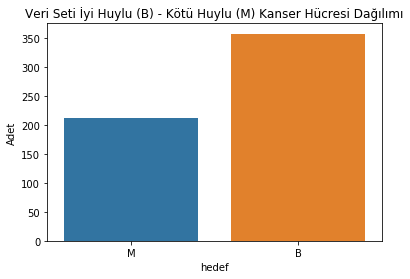

B    357
M    212
Name: hedef, dtype: int64


In [5]:
# buraya kod yazacağız
# veri içerisinde bulunan hastalık dağılımına bakalım
plt.figure()
sns.countplot(veri["hedef"])
plt.ylabel("Adet")
plt.title("Veri Seti İyi Huylu (B) - Kötü Huylu (M) Kanser Hücresi Dağılımı")
plt.show()
print(veri.hedef.value_counts())

In [6]:
# buraya kod yazacağız
# verinin içerisinde bulunan hedef etiketlerini 1 ve 0 olarak değiştirelim
# "M" -> 1; "B" -> 0
veri["hedef"] = [1 if i.strip() == "M" else 0 for i in veri.hedef]
veri.head(3)

,hedef,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [7]:
# buraya kod yazacağız
# verinin uzunluğu
print("Verinin Uzunluğu: ", len(veri))

Verinin Uzunluğu:  569


In [8]:
# buraya kod yazacağız
# verinin şekli
print("Verinin Şekli:", veri.shape)

Verinin Şekli: (569, 31)


In [9]:
# buraya kod yazacağız
# verinin özellikleri hakkına bilgi
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hedef                    569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [10]:
# buraya kod yazacağız
# verinin temel istatistiksel özellikleri
veri.describe()

,hedef,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


* Veriyi tanımak için yaptığımız bu temel analizlerden, verinin eğitim öncesi standardize edilmesi gerektiğini ve içerisinde kayıp veri bulunmadığını anlayabiliriz.

<a id="503"></a> <br>
### Keşifsel-Açıklayıcı Veri Analizi
* Hedef ve diğer özellikler arasında bulunan ilişkinin incelenmesi işlemini gerçekleştireceğiz

<Figure size 864x576 with 0 Axes>

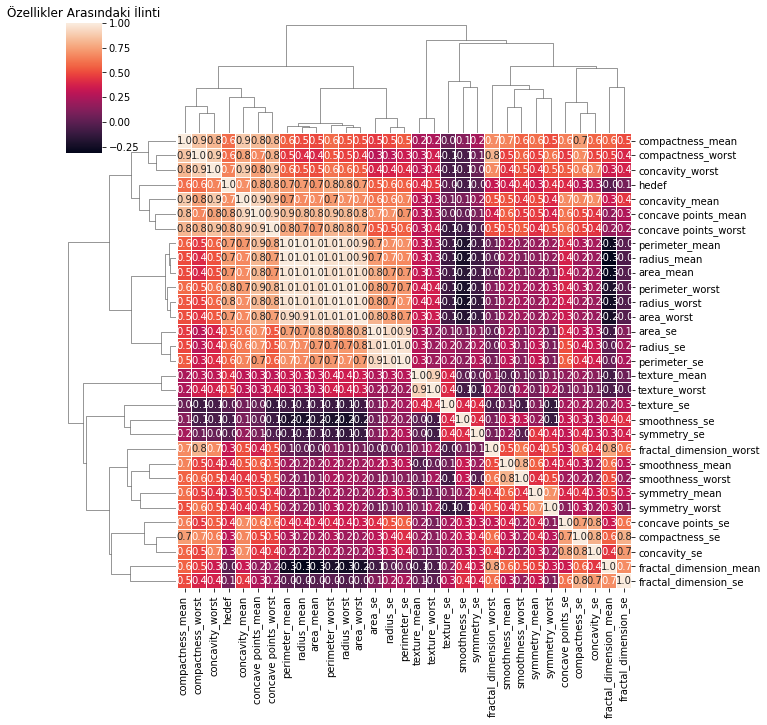

In [11]:
# buraya kod yazacağız
# verinin içerisinde bulunan bütün değerler arasındaki ilintiye bakalım
corr_matrix = veri.corr()
plt.figure(figsize = (12,8))
sns.clustermap(corr_matrix, annot = True, fmt = ".1f", linewidths=0.01)
plt.title("Özellikler Arasındaki İlinti")
plt.show()

<Figure size 432x288 with 0 Axes>

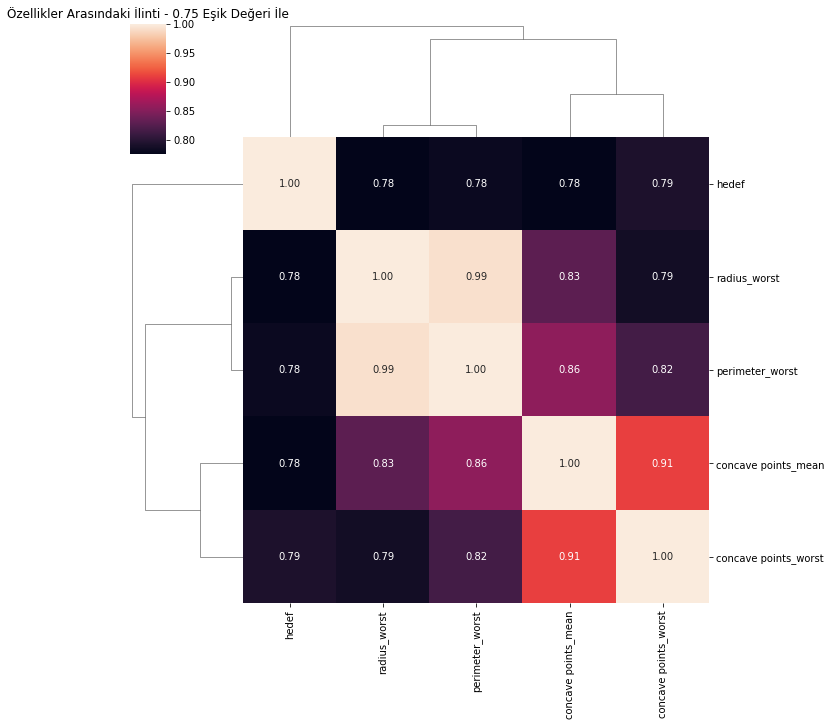

In [12]:
# buraya kod yazacağız
# hedef değişkeni ile ilintisi belirli bir eşik değerinin üstünde olanları inceleyelim
threshold = 0.75
filtre = np.abs(corr_matrix["hedef"]) > threshold
corr_features = corr_matrix.columns[filtre].tolist()
plt.figure()
sns.clustermap(veri[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Özellikler Arasındaki İlinti - 0.75 Eşik Değeri İle")
plt.show()

* Buradan kanser hücresinin sınıfını belirlemede radius_worst, perimeter_worst, concave points_mean ve concave points worst özelliklerinin etkili olduğu anlaşılıyor.

<Figure size 432x288 with 0 Axes>

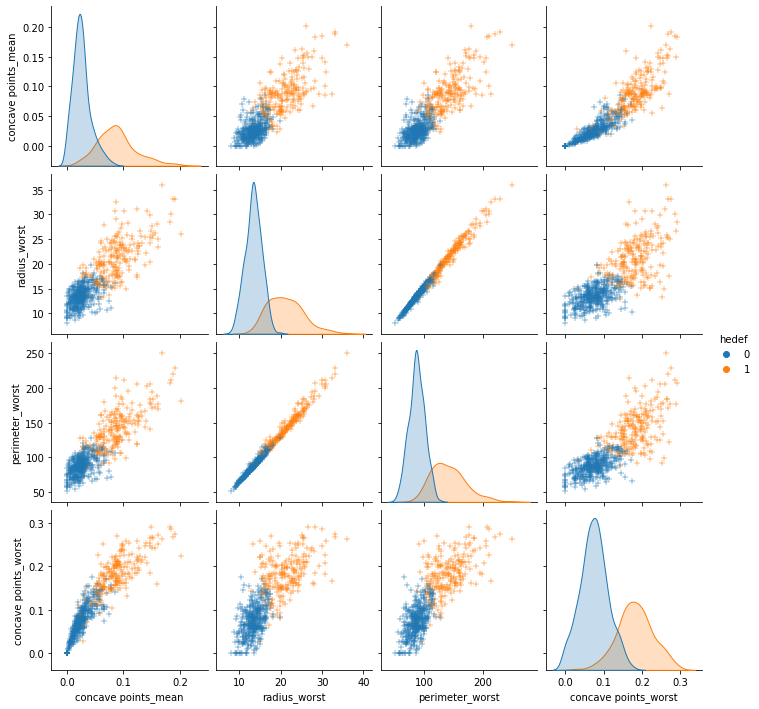

In [13]:
# buraya kod yazacağız
# hedef değişkeni ile ilintili özelliklerin saçılımına bakalım
plt.figure()
sns.pairplot(veri[corr_features], diag_kind = "kde", markers = "+", hue = "hedef")
plt.show()

* Şekilden anlaşılacağı üzere, farklı sınıflara ait verinin merkezleri birbirinden farklı olsa da, farklı sınıflar arasında kesişim görülmektedir. 

<a id="504"></a> <br>
### Aykırı Değer Tespiti ve Çıkarılması
* Yerel aykırı değer faktör algoritması, belirli bir veri noktasının komşularına göre yerel yoğunluk sapmasını hesaplayan denetimsiz bir aykırı değer algılama yöntemidir. 
* Komşularından önemli ölçüde daha düşük yoğunluğa sahip örnekleri aykırı değerler olarak kabul eder.

In [14]:
# buraya kod yazacağız
# veriyi x (bağımsız değişkenler) ve y (bağımlı değişken) olmak üzere ikiye ayıralım
y = veri.hedef
x = veri.drop(["hedef"], axis = 1)
columns = x.columns.tolist()

In [15]:
# buraya kod yazacağız
# Yerel Aykırı Değer Faktör Yöntemi
clf = LocalOutlierFactor()

# bu yöntemi uygulayalım
y_pred = clf.fit_predict(x)

# skora bakalım
X_score = clf.negative_outlier_factor_

In [16]:
# buraya kod yazacağız
# skoru bir veri çerçevesi haline getirip içerisine ekleyelim
outlier_score = pd.DataFrame()
outlier_score["score"] = X_score

In [17]:
# buraya kod yazacağız
# belirli bir eşik değerine göre aykırı değerleri bulalım
threshold = -2.2
filtre = outlier_score["score"] < threshold
outlier_index = outlier_score[filtre].index.tolist()

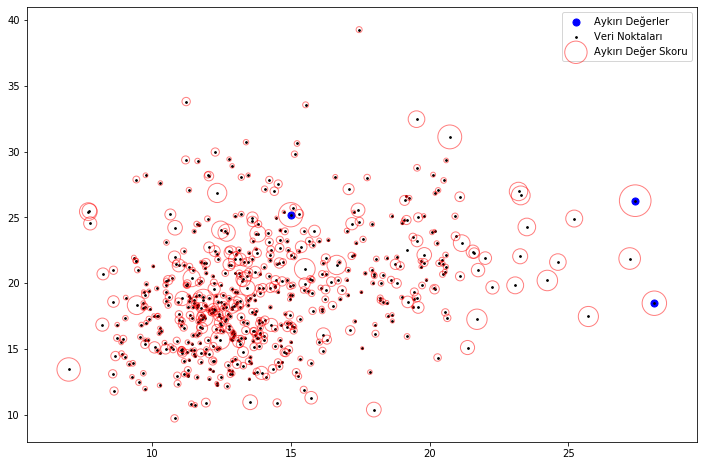

In [18]:
# buraya kod yazacağız
# yöntem ile belirlediğimiz aykırı değerleri çıkaralım
plt.figure(figsize=(12,8))
plt.scatter(x.iloc[outlier_index,0], x.iloc[outlier_index,1], color = "blue", s = 50, label = "Aykırı Değerler")
plt.scatter(x.iloc[:,0], x.iloc[:,1], color = "k", s = 3, label = "Veri Noktaları")
radius = (X_score.max() - X_score) / (X_score.max() - X_score.min())
outlier_score["radius"] = radius
plt.scatter(x.iloc[:,0], x.iloc[:,1], s = 1000*radius, edgecolors = "r", alpha = 0.5, facecolors = "none", label = "Aykırı Değer Skoru")
plt.legend()
plt.show()

In [19]:
# buraya kod yazacağız
# yerel aykırı değerleri çıkaralım
x = x.drop(outlier_index)
y = y.drop(outlier_index).values

<a id="505"></a> <br>
### Eğitim ve Test Veri Seti Bölünmesi
* Veriyi eğitim ve test veri seti olacak şekilde bölelim. eğitim = %70, test = %30

In [20]:
# buraya kod yazacağız
# Eğitim-Test bölütlemesi
X_egitim, X_test, Y_egitim, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)


<a id="506"></a> <br>
### Standardizasyon
* Standardizasyon işlemi, veriyi sıfır ortalamalı, 1 standart sapmalı hale getirme işlemidir.
* 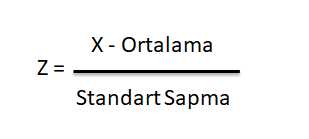
* Standardizasyon işleminde bulunan ortalama ve standart sapma değerlerini eğitim veri setine göre buluyoruz. Sonrasında hem eğitim veri setine hem de test veri setine uygulayacağız.
* Veriyi sıfır ortalama ve 1 standart sapmalı hale getirdikten sonra kutu grafiğine göz atabiliriz.

In [21]:
# buraya kod yazacağız
# standardizasyon (veya standart ölçeklendirme)
scaler = StandardScaler()
X_egitim = scaler.fit_transform(X_egitim) # eğitim veri setini standardize et
X_test = scaler.fit_transform(X_test) # test veri setini standardize edelim

In [22]:
# buraya kod yazacağız
# görselleştirmede kullanmak üzere bir veri çerçevesi oluşturalım
X_egitim_df = pd.DataFrame(X_egitim, columns = columns)
X_egitim_df_describe = X_egitim_df.describe()
X_egitim_df["hedef"] = Y_egitim

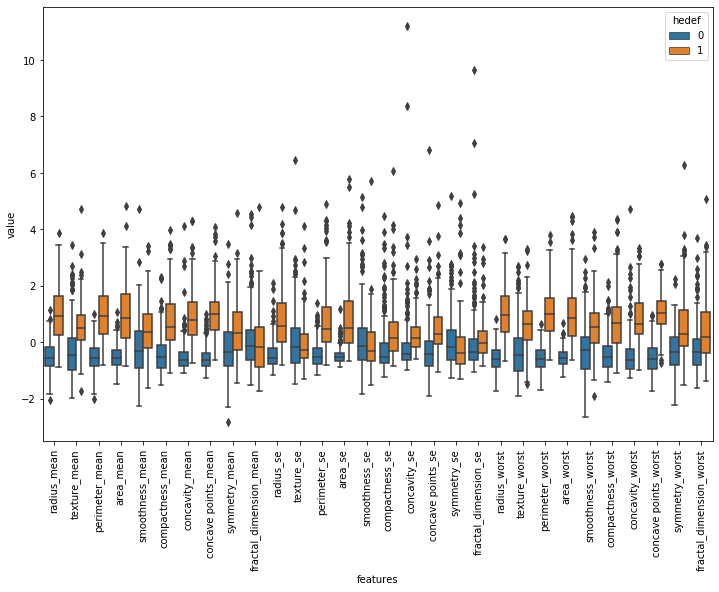

In [23]:
# buraya kod yazacağız
# kutu grafiği çizelim
data_melted = pd.melt(X_egitim_df, id_vars = "hedef",
                     var_name = "features", value_name = "value")
plt.figure(figsize = (12,8))
sns.boxplot(x="features", y="value", hue="hedef", data=data_melted)
plt.xticks(rotation = 90)
plt.show()

<a id="507"></a> <br>
### K-En Yakın Komşu
* Sınıflandırıcı olarak K En yakın komşu algoritmasını kullanalım.
* En uygun K değerini bulalım

In [24]:
# buraya kod yazacağız
# model
knn = KNeighborsClassifier(n_neighbors = 2)
# eğitim
knn.fit(X_egitim, Y_egitim)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [25]:
# buraya kod yazacağız
# tahmin
y_pred = knn.predict(X_test)

Karışıklık Matrisi:  [[102   0]
 [ 12  56]]


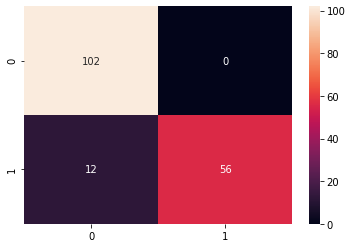

In [26]:
# buraya kod yazacağız
# karışıklık matrisi
cm = confusion_matrix(Y_test, y_pred)
print("Karışıklık Matrisi: ", cm)
plt.figure()
sns.heatmap(cm, annot = True, fmt = ".0f")
plt.show()

In [27]:
# buraya kod yazacağız
# doğruluk
dogruluk = accuracy_score(Y_test, y_pred)
print("Doğruluk: ", dogruluk)

Doğruluk:  0.9294117647058824


In [28]:
# en iyi k değeri
def eniyiParametreler(x_egitim, x_test, y_egitim, y_test):
    
    # k değeri
    k_range = list(range(1,31))
    # "uniform": tek tip ağırlıklar.tüm noktalar eşit olarak ağırlıklandırılmıştır.
    # "distance": mesafelerinin tersine göre ağırlık noktaları bu durumda, bir sorgu noktasının daha yakın komşuları, uzaktaki komşulardan daha büyük bir etkiye sahip olacaktır.
    weight_options = ["uniform","distance"] # farklı knn parametreleri
    
    # ızgara araması için parametreleri bir sözlük içerisine ekleyelim.
    param_grid = dict(n_neighbors = k_range, weights = weight_options)
    
    # knn sınıflandırıcı
    knn = KNeighborsClassifier()
    # çapraz doğrulama ile ızgara arama
    grid = GridSearchCV(knn, param_grid, cv = 10, scoring = "accuracy")
    # eğitim
    grid.fit(x_egitim, y_egitim)
    
    # en iyi sonucu veren parametrelerin gösterimi
    print("En iyi eğitim skoru: {} ve parametreler: {}".format(grid.best_score_, grid.best_params_))
    print()
    
    # en iyi sonucu veren parametreler ile yeni bir k en yakın komşu modeli yapalım
    knn = KNeighborsClassifier(**grid.best_params_)
    # eğitim
    knn.fit(x_egitim, y_egitim)
    
    # tahminleme
    y_pred_test = knn.predict(x_test)
    y_pred_train = knn.predict(x_egitim)
    
    # karışıklık matrisi
    cm_test = confusion_matrix(y_test, y_pred_test)
    cm_train = confusion_matrix(y_egitim, y_pred_train)
    
    # doğruluk ve sonuçların yazdırılması
    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_egitim, y_pred_train)
    print("Test doğruluğu: {}, Eğitim doğruluğu: {}".format(acc_test, acc_train))
    print()
    print("Karışıklık Matrisi Test: ")
    print(cm_test)
    print("Karışıklık Matrisi Eğitim: ")
    print(cm_train)
    
    return grid

In [29]:
# buraya kod yazacağız
# en iyi k değerinin bulunması ve bu değere ilişkin knn modeli kurulması
grid = eniyiParametreler(X_egitim, X_test, Y_egitim, Y_test)

En iyi eğitim skoru: 0.972051282051282 ve parametreler: {'n_neighbors': 4, 'weights': 'distance'}

Test doğruluğu: 0.9470588235294117, Eğitim doğruluğu: 1.0

Karışıklık Matrisi Test: 
[[102   0]
 [  9  59]]
Karışıklık Matrisi Eğitim: 
[[255   0]
 [  0 141]]


*  8-En yakın komşu "distance" özelliği ile oluşturulmuştur.

<a id="508"></a> <br>
### Temel Bileşenler Analizi
* Verimizi 2 temel bileşene düşürerek sınıflandırma yapacağız.

In [30]:
# buraya kod yazacağız
# standardizasyon
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [31]:
# buraya kod yazacağız
# pca oluşturalım
pca = PCA(n_components = 2)

In [32]:
# buraya kod yazacağız
# pca eğitimi
# hata veririse: x_scaled = x_scaled.astype('float32')
x_scaled = x_scaled.astype('float32')
pca.fit(x_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [33]:
# buraya kod yazacağız
# pca uygulama
X_reduced_pca = pca.transform(x_scaled)

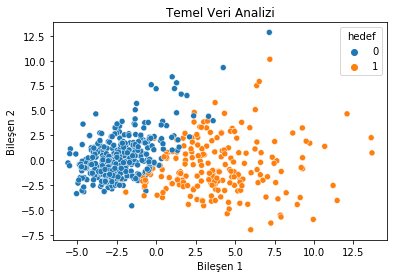

In [34]:
# buraya kod yazacağız
# pca'i yorumlamak için bir veri çerçevesine alalım
pca_data = pd.DataFrame(X_reduced_pca, columns = ["p1", "p2"])
pca_data["hedef"] = y
plt.figure()
sns.scatterplot(x = "p1", y = "p2", hue = "hedef", data = pca_data)
plt.title("Temel Veri Analizi")
plt.xlabel("Bileşen 1")
plt.ylabel("Bileşen 2")
plt.show()

In [35]:
# buraya kod yazacağız
# pca sonucunda elde ettiğimiz verinin eğitim-test bölütlemesi
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(X_reduced_pca, y, test_size = 0.3, random_state = 42)

In [36]:
# buraya kod yazacağız
# pca sonucunda elde ettiğimiz veriler ile 
# ızgara arama çapraz doğrulama yaparak k-nn algoritmasının
# en uygun parametrelerini bulalım
grid_pca = eniyiParametreler(X_train_pca, X_test_pca, Y_train_pca, Y_test_pca)

En iyi eğitim skoru: 0.9518589743589743 ve parametreler: {'n_neighbors': 7, 'weights': 'uniform'}

Test doğruluğu: 0.9294117647058824, Eğitim doğruluğu: 0.9545454545454546

Karışıklık Matrisi Test: 
[[97  5]
 [ 7 61]]
Karışıklık Matrisi Eğitim: 
[[247   8]
 [ 10 131]]


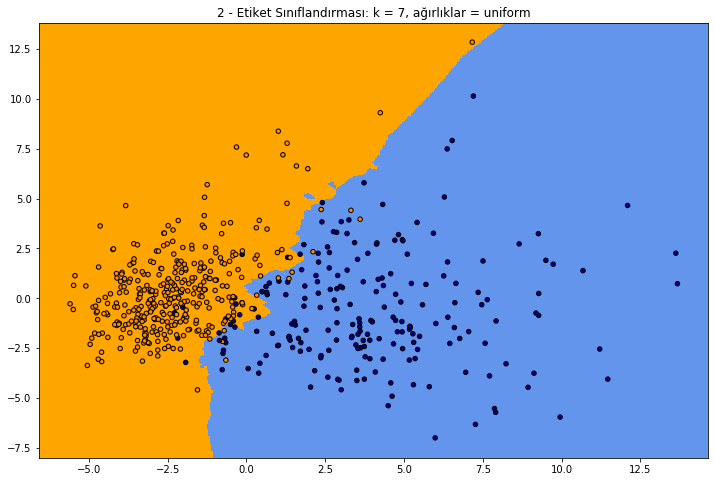

In [37]:
# buraya kod yazacağız
# nca sonucu elde edilen verinin tahminlenmesi ve görselleştirilmesi
cmap_light = ListedColormap(['orange',  'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

h = 0.05 # mesh boyutu
X = X_reduced_pca
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = grid_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# 
Z = Z.reshape(xx.shape)
plt.figure(figsize=(12,8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# eğitimde kullanılan her bir noktayı görselleştirelim.
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("{} - Etiket Sınıflandırması: k = {}, ağırlıklar = {}".format(2, grid_pca.best_estimator_.n_neighbors, grid_pca.best_estimator_.weights))
plt.show()

<a id="509"></a> <br>
### Komşuluk Bileşenleri Analizi
* Komşuluk bileşenleri analizi, çok değişkenli verilerin veriler üzerinde belirli bir mesafe ölçüsüne göre farklı sınıflarda sınıflandırılması için denetimli bir öğrenme yöntemidir.

In [38]:
# buraya kod yazacağız
nca = NeighborhoodComponentsAnalysis(n_components = 2, random_state = 42)

In [39]:
# buraya kod yazacağız
# komşuluk eğitimi
nca.fit(x_scaled, y)

NeighborhoodComponentsAnalysis(callback=None, init='auto', max_iter=50,
                               n_components=2, random_state=42, tol=1e-05,
                               verbose=0, warm_start=False)

In [40]:
# buraya kod yazacağız
# komşuluk uygula
X_reduced_nca = nca.transform(x_scaled)

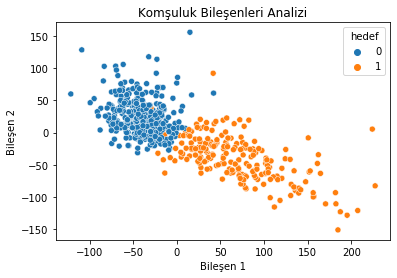

In [41]:
# buraya kod yazacağız
# komşuluk sonucunu yorumlamak için veri çerçevesi içerisine alalım
nca_data = pd.DataFrame(X_reduced_nca, columns = ["p1", "p2"])
nca_data["hedef"] = y
plt.figure()
sns.scatterplot(x = "p1", y = "p2", hue = "hedef", data = nca_data)
plt.title("Komşuluk Bileşenleri Analizi")
plt.xlabel("Bileşen 1")
plt.ylabel("Bileşen 2")
plt.show()

In [42]:
# buraya kod yazacağız
# nca sonucunda elde ettiğimiz verinin eğitim-test bölütlemesi
X_train_nca, X_test_nca, Y_train_nca, Y_test_nca = train_test_split(X_reduced_nca, y, test_size = 0.3, random_state = 42)

In [43]:
# buraya kod yazacağız
# nca sonucunda elde ettiğimiz veriler için en iyi knn değerlerinin bulunması
grid_nca = eniyiParametreler(X_train_nca, X_test_nca, Y_train_nca, Y_test_nca)

En iyi eğitim skoru: 0.9923717948717948 ve parametreler: {'n_neighbors': 5, 'weights': 'uniform'}

Test doğruluğu: 0.9764705882352941, Eğitim doğruluğu: 0.9949494949494949

Karışıklık Matrisi Test: 
[[102   0]
 [  4  64]]
Karışıklık Matrisi Eğitim: 
[[255   0]
 [  2 139]]


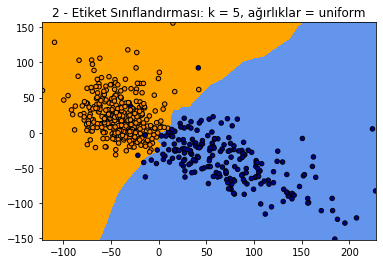

In [44]:
# buraya kod yazacağız
# nca sonucu elde edilen verinin görselleştirilmesi
cmap_light = ListedColormap(['orange',  'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

h = 0.2 # mesh boyutu
X = X_reduced_nca
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = grid_nca.predict(np.c_[xx.ravel(), yy.ravel()])

# 
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# eğitimde kullanılan her bir noktayı görselleştirelim.
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("{} - Etiket Sınıflandırması: k = {}, ağırlıklar = {}".format(2, grid_nca.best_estimator_.n_neighbors, grid_nca.best_estimator_.weights))
plt.show()

<a id="600"></a> <br>
## Duygu Analizi
* Yapay zekanın, bir alt kümesi olan doğal dil işlemenin temel alanlarından biri, konuşma ve baskıdaki duygusal tonları anlama yeteneği olan duygu analizidir.
* Duygu analizi, kuruluşların pazarlama kampanyalarını yönlendirme, yatırım getirisini ölçme ve müşteri hizmetlerini iyileştirme gibi alanlarda kolaylık sağlar.
* Günlük hayatın önemli problemlerinden olan duygu analizinin nasıl yapıldığını birlikte inceleyeceğiz.

<a id="601"></a> <br>
### Veri Seti ve Problem Tanımı
* Veri seti IMDB film incelemeleri/yorumlarından oluşmaktadır.
* IMDB filmler, diziler, televizyon programları, video oyunları ve internet içerikleri hakkında bilgiler barındıran çevrimiçi bir veritabanıdır. Yapımlarla ilgili oyuncu kadrosu, yapım ekibi, biyografiler, özetler, ilginç bilgiler, puanlar ve eleştiriler gibi bilgileri içerir.
* IMDB veri seti, doğal dil işleme ve ya metin analizi için 50 bin film incelemesine sahiptir. Toplamda 25000 eğitim ve 25000 test verisi bulunmaktadır.
* Biz bu bölümde, IMDB veri setinde bulunan yorumları kullanarak duygu sınıflandırma problemi çözeceğiz. Hangi yorumun olumlu hangi yorumun olumsuz olduğunu sınıflandıracağız.
* Bu projede kullanılan veri seti için referans: 
    * Andrew L. Maas, Raymond E. Daly, Peter T. Pham, Dan Huang, Andrew Y. Ng, and Christopher Potts. (2011). Learning Word Vectors for Sentiment Analysis. The 49th Annual Meeting of the Association for Computational Linguistics (ACL 2011)

In [45]:
# buraya kod yazacağız
# kütüphaneleri içeris aktaralım
# temel kütüphaneler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# derin öğrenme kütüphaneleri
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import SimpleRNN, Dense, Activation

# uyarılar
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [46]:
# buraya kod yazacağız
# veriyi içeri aktaralım
(X_egitim, Y_egitim), (X_test, Y_test) = imdb.load_data(path = "ibdb.npz",
                                                        num_words = None,
                                                        skip_top = 0,
                                                        maxlen = None,
                                                        seed = 113,
                                                        start_char = 1,
                                                        oov_char = 2,
                                                        index_from = 3)

In [47]:
# buraya kod yazacağız
# verinin tipine bakalım
print("X eğitim tipi: ", type(X_egitim))
print("Y eğitim tipi: ", type(Y_egitim))

X eğitim tipi:  <class 'numpy.ndarray'>
Y eğitim tipi:  <class 'numpy.ndarray'>


In [48]:
# buraya kod yazacağız
# verinin şekline bakalım
print("X eğitim şekli: ", X_egitim.shape)
print("Y eğitim şekli: ", Y_egitim.shape)

X eğitim şekli:  (25000,)
Y eğitim şekli:  (25000,)


<a id="602"></a> <br>
### Keşifsel-Açıklayıcı Veri Analizi
* Keşifsel veri analizinde, verimiz içerisinde kaç farklı etiket/duygu olduğunu, eğitim ve test veri setlerinin dağılımını, bazı örnek yorumları ve veri seti içerisinde bulunan kelime sayısını inceleyelim.

In [49]:
# buraya kod yazacağız
# kaç tane etiket olduğuna bakalım
print("Y eğitim değerleri: ", np.unique(Y_egitim))
print("Y test değerleri: ", np.unique(Y_test))

Y eğitim değerleri:  [0 1]
Y test değerleri:  [0 1]


In [50]:
# buraya kod yazacağız
# eğitim veri setinin dağılımına bakalım
unique, counts = np.unique(Y_egitim, return_counts = True)
print("Y eğitim dağılımı: ",dict(zip(unique,counts)))

Y eğitim dağılımı:  {0: 12500, 1: 12500}


In [51]:
# buraya kod yazacağız
# test veri setinin dağılımına bakalım
unique, counts = np.unique(Y_test, return_counts = True)
print("Y test dağılımı: ",dict(zip(unique,counts)))

Y test dağılımı:  {0: 12500, 1: 12500}


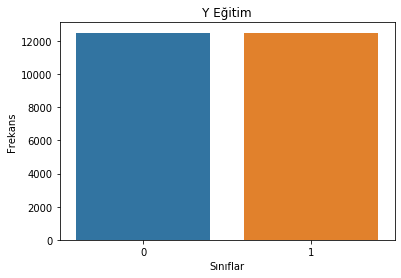

In [52]:
# buraya kod yazacağız
plt.figure()
sns.countplot(Y_egitim)
plt.xlabel("Sınıflar")
plt.ylabel("Frekans")
plt.title("Y Eğitim")
plt.show()

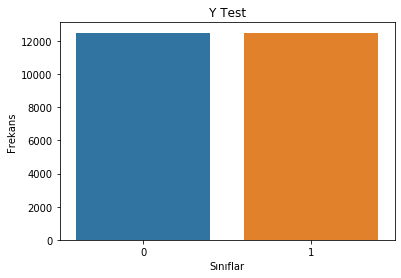

In [53]:
# buraya kod yazacağız
plt.figure()
sns.countplot(Y_test)
plt.xlabel("Sınıflar")
plt.ylabel("Frekans")
plt.title("Y Test")
plt.show()

In [54]:
# buraya kod yazacağız
# örnek bir yoruma bakalım
yorum = X_egitim[0]
print("Yorum: ")
print(yorum)
print("Yorum kelime sayısı: ",len(yorum))

Yorum: 
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Yorum kelime sayısı:  218


* Gördüğünüz gibi anlamlı bir cümle çıkmak yerine, karşımıza sayılardan oluşan bir liste çıktı.
* Bu sayıların her biri bir kelimeye karşılık geliyor.
* Burada yazan yorumun ne olduğuna birazdan bakacağız.

In [55]:
# buraya kod yazacağız
# kelime sayısı
word_index = imdb.get_word_index()
print("Kelime sayısı: ",len(word_index))

Kelime sayısı:  88584


In [56]:
# buraya kod yazacağız
# veri içerisinde bulunan kelimelerin anlamlandırılması; mesela yukarıdaki liste içerisindeki bazı sayıları seçelim
for keys, values in word_index.items():
    if values == 1: # 1 - 14 - 22 olabilir
        print(keys)

the


In [57]:
# buraya kod yazacağız
def neSoyledi(index = 24):
    """
        index = eğitim veri setinde bulunan yorumun indeksi
    """
    
    ters_indeks = dict([(value, key) for (key, value) in word_index.items()])
    yorumu_coz = " ".join([ters_indeks.get(i - 3, "!") for i in X_egitim[index]])
    print("Yorum: ",index)
    print(yorumu_coz)
    print()
    if Y_egitim[index] == 0:
        print("Olumsuz")
    else:
        print("Olumlu")
    print()
    
# 36. yorum
neSoyledi(36)

Yorum:  36
! sorry i just didn't find the subject matter as compelling as the filmmaker did the robot guy and the mole rat guy were pretty interesting although morris didn't really tell us much about them the other two subjects were a bore and the supposed connections between them didn't hold up

Olumsuz



In [58]:
# buraya kod yazacağız
# yukarıda bakıp anlamadığımız 0. yorum
neSoyledi(0)

Yorum:  0
! this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and

<a id="603"></a> <br>
### Ön İşlem
* Veri setimizi en çok kullanılan 15000 kelime ile sınırlandıralım.
* Tekrarlanan sinir ağı girdi sayısını belirleyelim. (Bir yorumun kaç kelime olacağı)

In [59]:
# buraya kod yazacağız
# en çok kullanılan 15000 kelime ile işlem yapalım
num_words = 15000
(X_egitim, Y_egitim), (X_test, Y_test) = imdb.load_data(num_words=num_words)

In [60]:
# buraya kod yazacağız
# yorumları maksimum 130 kelime ile sınırla, eğer yorum 130 kelimeden az is yorumu sıfır ile doldur.
# tekrarlanan sinir ağlarında girdinin boyutu sabit olmalı; bu nedenle böyle bir işlem yapıyoruz.
maxlen = 130
X_egitim = pad_sequences(X_egitim, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

print(X_egitim[5])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    1  778  128   74   12  630  163   15    4 1766 7982
 1051    2   32   85  156   45   40  148  139  121  664  665   10   10
 1361  173    4  749    2   16 3804    8    4  226   65   12   43  127
   24    2   10   10]


<a id="604"></a> <br>
### Tekrarlayan Sinir Ağı Oluşturma
* Tekrarlayan sinir ağı katmanını relu aktivasyon fonksiyonu ile tasarlayalım.
* Veri setimizde iki farklı etiket olduğu için, çıktı katmanında sigmoid fonksiyonu kullanalım.
* Maliyet fonksiyonu olarak ikili çapraz entropi fonksiyonunu, rmsprop optimizasyon yöntemini ve değerlendirme metriği olarak da doğruluğu kullanacağız.

In [61]:
# buraya kod yazacağız
# tekrarlanan sinir ağının temelini tanımlayalım
rnn = Sequential()
rnn.add(Embedding(num_words, 32, input_length = len(X_egitim[0]))) # Pozitif tam sayıları (dizinler) sabit boyutlu yoğun vektörlere dönüştürür. # örneğin [[4], [20]] -> [[0.25, 0.1], [0.6, -0.2]]
rnn.add(SimpleRNN(16, input_shape = (num_words,maxlen), return_sequences= False, activation= 'relu'))
rnn.add(Dense(1))
rnn.add(Activation("sigmoid"))
print(rnn.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 130, 32)           480000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 16)                784       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 480,801
Trainable params: 480,801
Non-trainable params: 0
_________________________________________________________________
None


In [62]:
# buraya kod yazacağız
rnn.compile(loss = "binary_crossentropy", optimizer="rmsprop",metrics= ["accuracy"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


<a id="605"></a> <br>
### Tekrarlayan Sinir Ağı Eğitimi
* Eğitimi gerçekleştirirken 5 iterasyon ve 128 batch boyutu kullanacağız.

In [63]:
# buraya kod yazacağız
# eğitimi gerçekleştirip sonuçları tarih içerisinde depolayalım
tarih = rnn.fit(X_egitim, Y_egitim, validation_data= (X_test, Y_test), epochs=5, batch_size=128, verbose=1)


Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 12s 469us/step - loss: 0.6304 - accuracy: 0.6478 - val_loss: 0.4938 - val_accuracy: 0.7912
Epoch 2/5
25000/25000 [==============================] - 11s 460us/step - loss: 0.4110 - accuracy: 0.8192 - val_loss: 0.3602 - val_accuracy: 0.8462
Epoch 3/5
25000/25000 [==============================] - 13s 503us/step - loss: 0.3052 - accuracy: 0.8763 - val_loss: 0.5181 - val_accuracy: 0.7811
Epoch 4/5
25000/25000 [==============================] - 13s 517us/step - loss: 0.2455 - accuracy: 0.9016 - val_loss: 0.3454 - val_accuracy: 0.8556
Epoch 5/5
25000/25000 [==============================] - 13s 539us/step - loss: 0.2066 - accuracy: 0.9208 - val_loss: 0.3310 - val_accuracy: 0.8623


In [64]:
# buraya kod yazacağız
dogruluk = rnn.evaluate(X_test, Y_test)
print("Test Doğruluk: %",dogruluk[1]*100)

25000/25000 [==============================] - 9s 354us/step
Test Doğruluk: % 86.2280011177063


<a id="606"></a> <br>
### Sonuçların Değerlendirilmesi
* Maliyet ve doğruluk değişimlerini inceleyeceğiz.

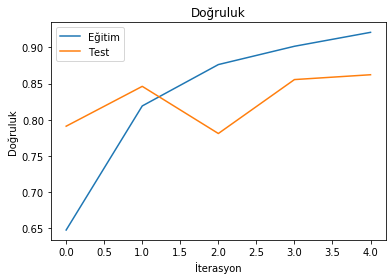

In [65]:
# buraya kod yazacağız
# doğruluğu görselleştirelim
plt.figure()
plt.plot(tarih.history["accuracy"], label = "Eğitim")
plt.plot(tarih.history["val_accuracy"], label = "Test")
plt.title("Doğruluk")
plt.ylabel("Doğruluk")
plt.xlabel("İterasyon")
plt.legend()
plt.show()

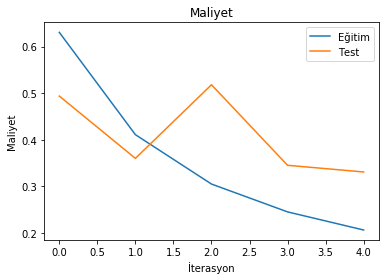

In [66]:
# buraya kod yazacağız
# maliyeti görselleştirelim
plt.figure()
plt.plot(tarih.history["loss"], label = "Eğitim")
plt.plot(tarih.history["val_loss"], label = "Test")
plt.title("Maliyet")
plt.ylabel("Maliyet")
plt.xlabel("İterasyon")
plt.legend()
plt.show()

<a id="700"></a> <br>
## Araçların Yakıt Tüketimi Tahmini
* Yapay zeka kullanılarak herhangi bir motorlu taşıtın yakıt tüketimi tahmini yapılarak, gerekli müdahaleler ve yöntemler ile yakıt tüketimi azaltılabilir.
* Araçların yakıt tüketimi tahminin yapay zeka ile nasıl yapıldığını çözelim.

<a id="701"></a> <br>
### Veri Seti ve Problem Tanımı
* Veri içerisinde, arabaların teknik özellikleri bulunmaktadır.
* Veri içerisinde bulunan özelliklerin tanımları:
    1. mpg (hedef): Yakıt tüketimi, 1 galon benzin/mazotla kaç mil gittiğini gösterir
    1. cylinders (silindir): Motorun güç birimi
    1. displacement (motor_hacmi): Aracın motor hacmi 
    1. horsepower (beygir_gücü): Aracın beygir gücü
    1. weight (agirlik): Aracın ağırlığı
    1. acceleration (ivme): Aracın hızlanması
    1. model year (model_yil): Aracın yılı
    1. origin (mensei): Aracın hangi ülkenin ürünü olduğu
* Bu projede kullanılan veri seti için referans:
    * Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

In [67]:
# buraya kod yazacağız
# Kütüphanelerin içe aktarılması
# Temel kütüphaneler
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# istatistik kütüphanesi
from scipy import stats
from scipy.stats import norm, skew

# makine öğrenmesi
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.base import clone

# uyarılar
import warnings
warnings.filterwarnings('ignore')

In [68]:
# buraya kod yazacağız
# veriyi içe aktaralım
sutun_isimleri = ["hedef", "silindir", "motor_hacmi", "beygir_gucu", "agirlik", "ivme", "model_yil", "mensei"]
veri = pd.read_csv("auto-mpg.data", names = sutun_isimleri, na_values = "?", comment = "\t",sep = " ", skipinitialspace = True)
print(veri.head())

   hedef  silindir  motor_hacmi  beygir_gucu  agirlik  ivme  model_yil  mensei
0   18.0         8        307.0        130.0   3504.0  12.0         70       1
1   15.0         8        350.0        165.0   3693.0  11.5         70       1
2   18.0         8        318.0        150.0   3436.0  11.0         70       1
3   16.0         8        304.0        150.0   3433.0  12.0         70       1
4   17.0         8        302.0        140.0   3449.0  10.5         70       1


In [69]:
# buraya kod yazacağız
# veri 398 adet örnekten ve 8 özellikten oluşmakta
print("Veri Şekli: ", veri.shape)

Veri Şekli:  (398, 8)


In [70]:
# buraya kod yazacağız
# veri hakkında bilgi
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hedef        398 non-null    float64
 1   silindir     398 non-null    int64  
 2   motor_hacmi  398 non-null    float64
 3   beygir_gucu  392 non-null    float64
 4   agirlik      398 non-null    float64
 5   ivme         398 non-null    float64
 6   model_yil    398 non-null    int64  
 7   mensei       398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [71]:
# buraya kod yazacağız
# temel istatistiksel özellikler
veri.describe()

,hedef,silindir,motor_hacmi,beygir_gucu,agirlik,ivme,model_yil,mensei
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


<a id="702"></a> <br>
### Kayıp Veri Sorunu
* Beygir gücünde bulunan kayıp veriyi beygir gücü değişkenin ortalaması ile dolduralım

In [72]:
# buraya kod yazacağız
# kayıp veri bulma
print(veri.isna().sum())

hedef          0
silindir       0
motor_hacmi    0
beygir_gucu    6
agirlik        0
ivme           0
model_yil      0
mensei         0
dtype: int64


In [73]:
# buraya kod yazacağız
# beygir gücünde bulunan eksiği ortalama ile doldur
veri["beygir_gucu"]=veri["beygir_gucu"].fillna(veri["beygir_gucu"].mean())
print(veri.isna().sum())

hedef          0
silindir       0
motor_hacmi    0
beygir_gucu    0
agirlik        0
ivme           0
model_yil      0
mensei         0
dtype: int64


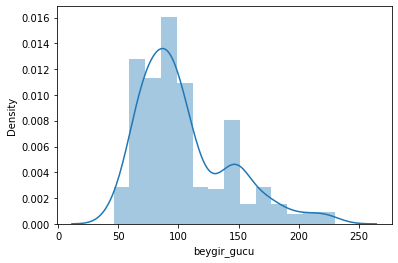

In [74]:
# buraya kod yazacağız
# beygir gücündeki kayıp verileri veri ortalaması ile doldurduk;
# verinin dağılımı üzerine etkisine bakalım
sns.distplot(veri.beygir_gucu)

<a id="703"></a> <br>
### Keşifsel-Açıklayıcı Veri Analizi
* Veri özellikleri arasındaki ilişkiyi inceleyelim.
* Kategorik ve sayısal özellikleri inceleyelim.
* Aykırı değerlere bakalım.

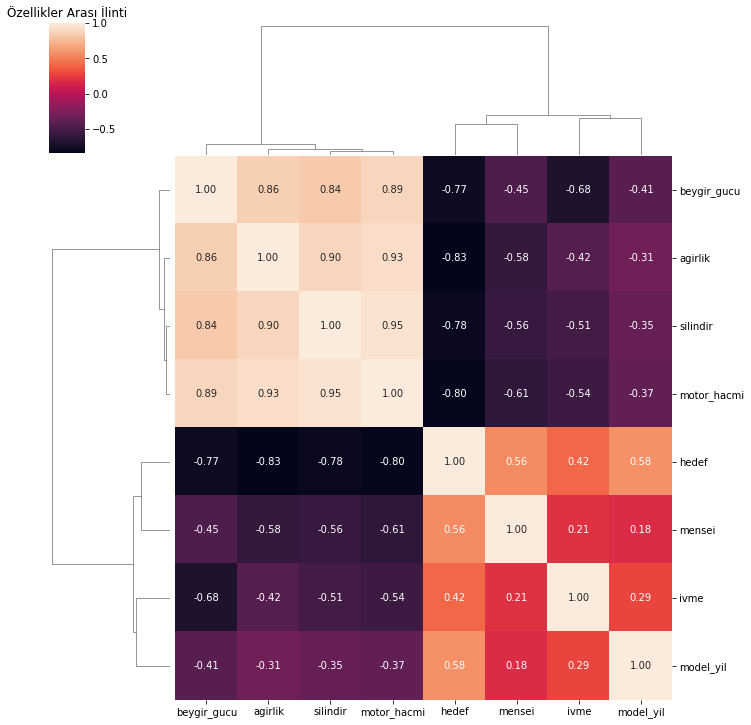

In [75]:
# buraya kod yazacağız
# hedef değişkeni ile diğer özellikler arasındaki ilinti bizim için önemli
corr_matrix = veri.corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Özellikler Arası İlinti")
plt.show()

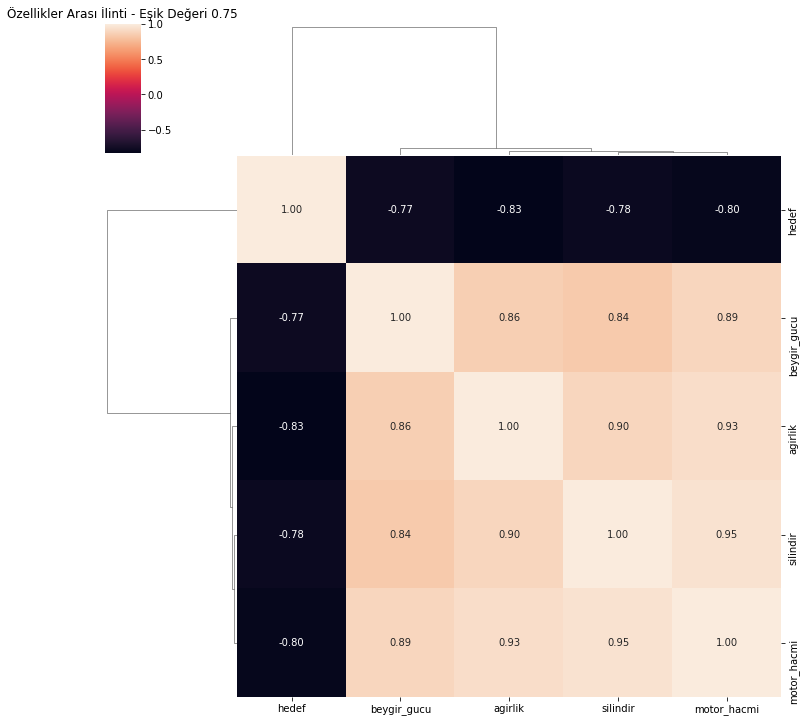

In [76]:
# buraya kod yazacağız
# hedef değişkeni ile arasındaki ilinti 0.75'ten büyük olan özelliklerin incelenmesi
threshold = 0.75
filtre = np.abs(corr_matrix["hedef"]) > threshold
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(veri[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Özellikler Arası İlinti - Eşik Değeri 0.75")
plt.show()

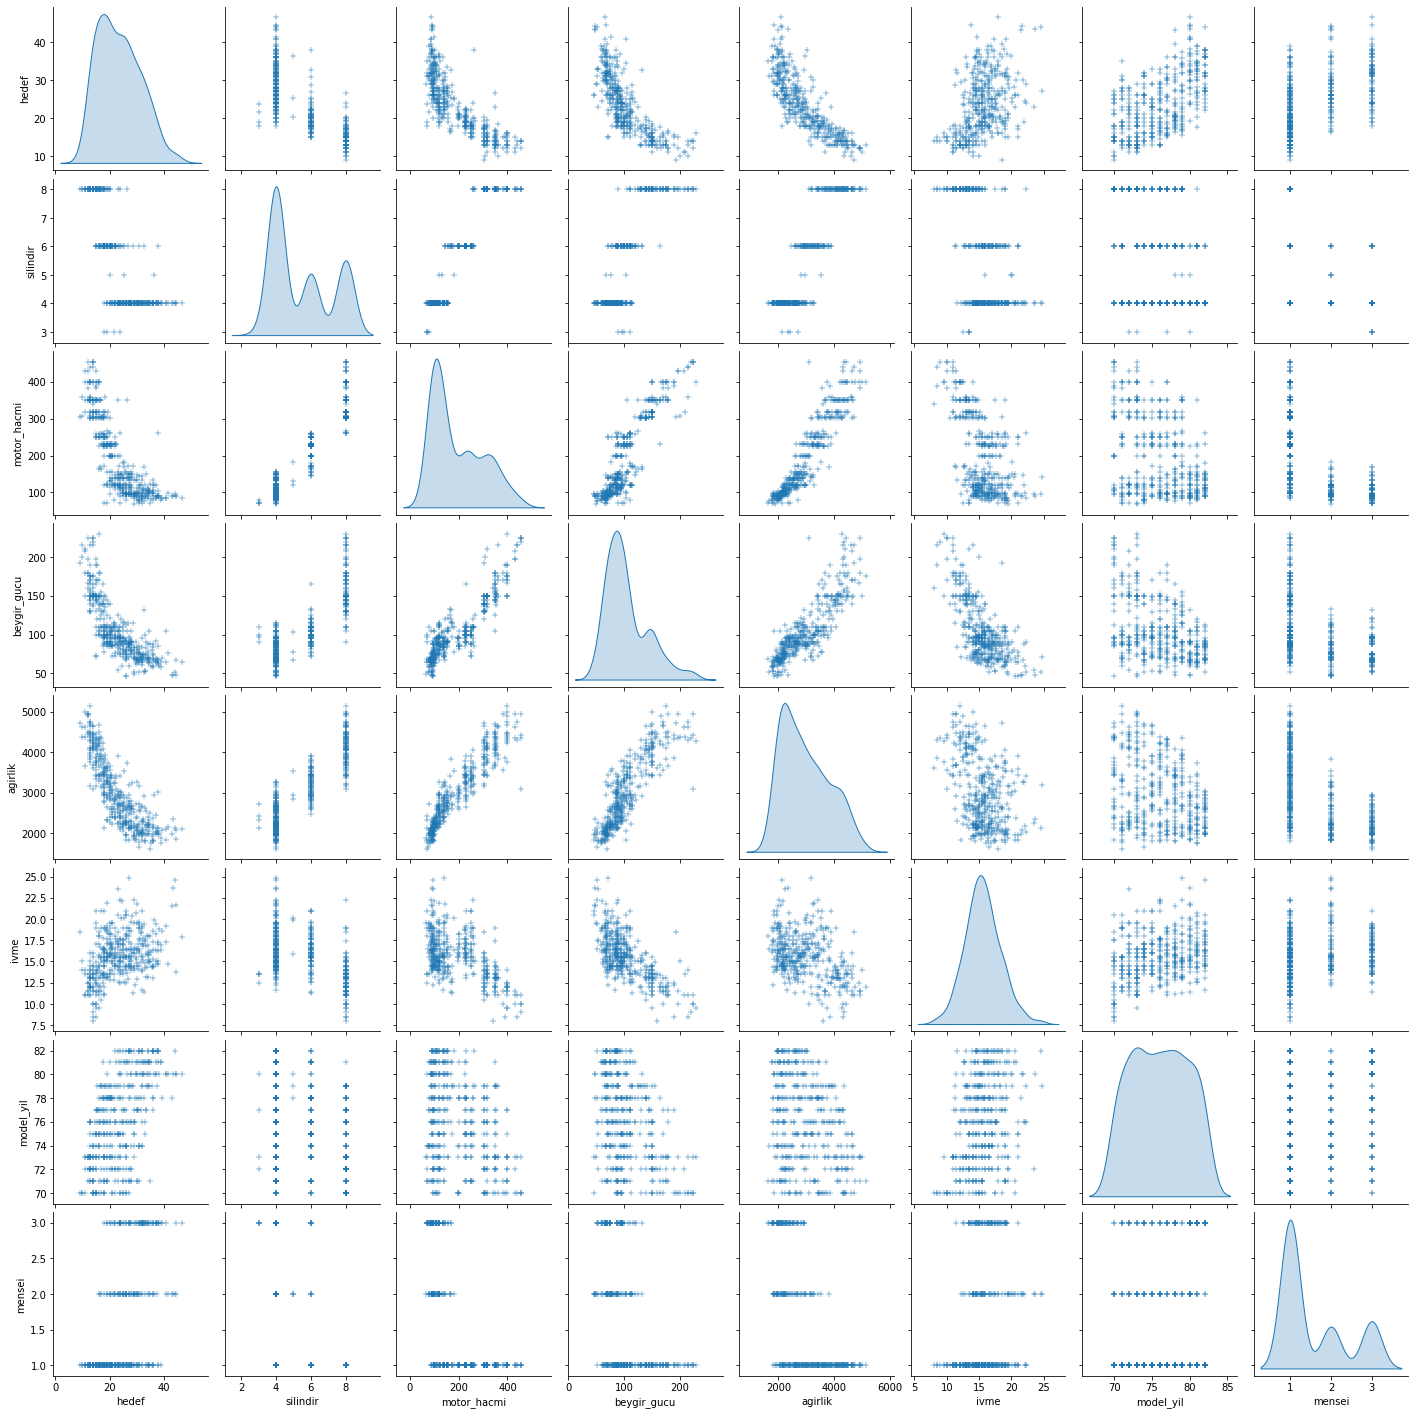

In [77]:
# buraya kod yazacağız
sns.pairplot(veri, diag_kind = "kde", markers = "+")
plt.show()

* Çoklu Doğrusal Bağlantı

4    204
8    103
6     84
3      4
5      3
Name: silindir, dtype: int64


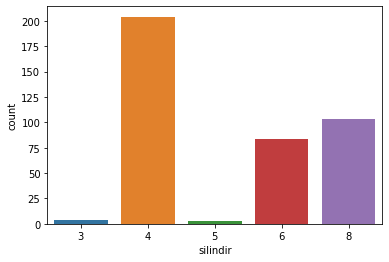

In [78]:
# buraya kod yazacağız
plt.figure()
sns.countplot(veri["silindir"])
print(veri["silindir"].value_counts())

1    249
3     79
2     70
Name: mensei, dtype: int64


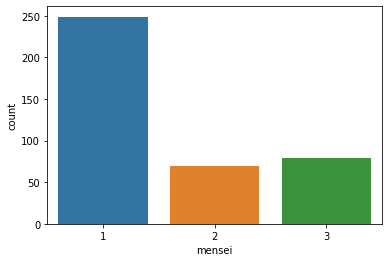

In [79]:
# buraya kod yazacağız
plt.figure()
sns.countplot(veri["mensei"])
print(veri["mensei"].value_counts())

* 5 farklı silindir değeri ve 3 farklı mensei değeri bulunmaktadır.
* Bu özellikleri kategorik hale getirebiliriz. 

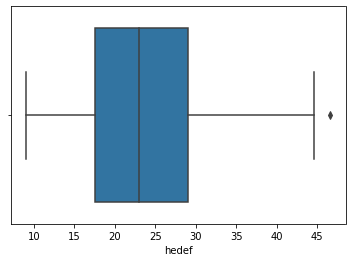

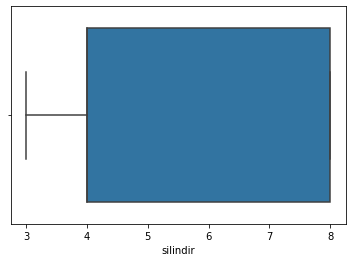

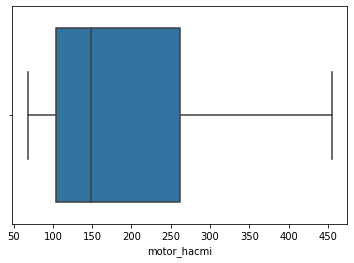

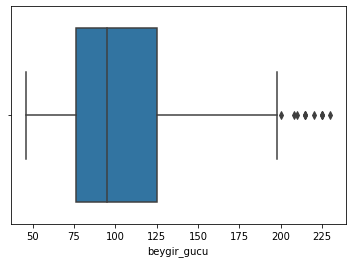

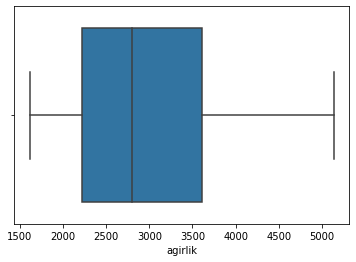

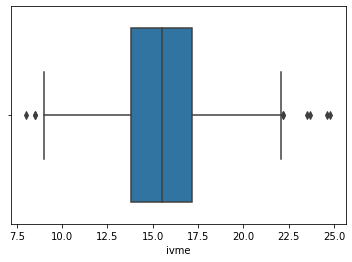

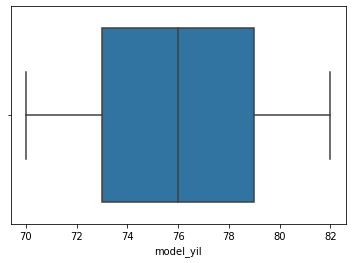

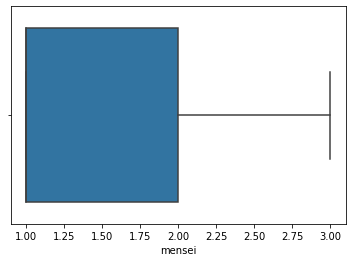

In [80]:
# buraya kod yazacağız
for c in veri.columns:
    plt.figure()
    sns.boxplot(x = c, data = veri, orient = "v")

* Kutu grafiklerinden anladığımıza göre beygir gücün ve ivme özelliklerinde aykırı değerler bulunmaktadır.

<a id="704"></a> <br>
### Aykırı Değer Tespiti ve Çıkarılması
* Beygir gücü ve ivme özelliklerinde bulunan aykırı değerleri çıkaralım.
* Aykırı değerler regresyon modellerinin eğitimini bozacaktır.

In [81]:
# buraya kod yazacağız
tanım = veri.describe()
tanım

,hedef,silindir,motor_hacmi,beygir_gucu,agirlik,ivme,model_yil,mensei
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [82]:
# beygir gücü
thr = 2
horsepower_desc = tanım["beygir_gucu"]
q3_hp = horsepower_desc[6]
q1_hp = horsepower_desc[4]
IQR_hp = q3_hp - q1_hp
top_limit_hp = q3_hp + thr*IQR_hp
bottom_limit_hp = q1_hp - thr*IQR_hp
filter_hp_bottom = bottom_limit_hp < veri["beygir_gucu"]
filter_hp_top = veri["beygir_gucu"] < top_limit_hp
filter_hp = filter_hp_bottom & filter_hp_top

veri = veri[filter_hp]

In [83]:
# ivme
acceleration_desc = tanım["ivme"]
q3_acc = acceleration_desc[6]
q1_acc = acceleration_desc[4]
IQR_acc = q3_acc - q1_acc # q3 - q1
top_limit_acc = q3_acc + thr*IQR_acc
bottom_limit_acc = q1_acc - thr*IQR_acc
filter_acc_bottom = bottom_limit_acc < veri["ivme"]
filter_acc_top= veri["ivme"] < top_limit_acc
filter_acc = filter_acc_bottom & filter_acc_top

veri = veri[filter_acc] 

<a id="705"></a> <br>
### Öz Nitelik Mühendisliği - Çarpıklık Problemi
* Çarpıklık olasılık kuramı ve istatistik bilim dallarında bir reel-değerli rassal değişkenin olasılık dağılımının simetrik olamayışının ölçülmesidir.
* 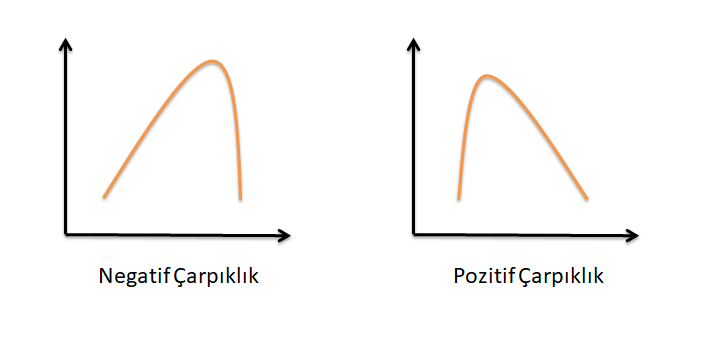
* Box Cox dönüşümü ile problemin olumsuz etkisini azaltacağız.
* Bir Box Cox dönüşümü, normal olmayan bağımlı değişkenlerin normal bir şekle dönüştürülmesidir. Normallik, birçok istatistiksel teknik için önemli bir varsayımdır. Verileriniz normal değilse, Box-Cox uygulamak, daha fazla sayıda test yapabileceğiniz anlamına gelir.

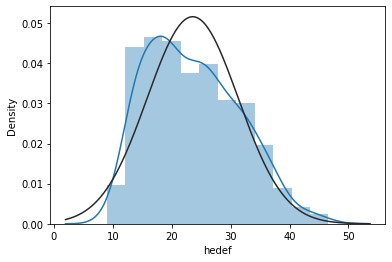

In [84]:
# buraya kod yazacağız
plt.figure()
sns.distplot(veri.hedef, fit = norm) # üzerine normal (Gauss) dağılımını da çizdirelim ki çarpıklığı görebilelim
plt.show()

In [85]:
# buraya kod yazacağız
(mu, sigma) = norm.fit(veri["hedef"])
print("mu: {}, sigma: {}".format(mu, sigma))

mu: 23.55, sigma: 7.7342235735537335


Q-Q Grafiği
* İstatistiklerde, iki olasılık dağılımını miktarlarını birbirlerine göre çizerek karşılaştırmak için grafiksel bir yöntem olan bir olasılık grafiğidir.

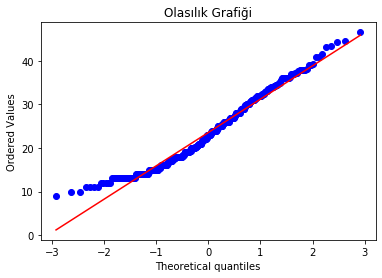

In [86]:
# buraya kod yazacağız
# qq-grafiği
plt.figure()
stats.probplot(veri["hedef"], plot = plt)
plt.title("Olasılık Grafiği")
plt.show()

In [87]:
# buraya kod yazacağız
# log1p dönüşümü ile çarpıklığı azaltalım
veri["hedef"] = np.log1p(veri["hedef"])

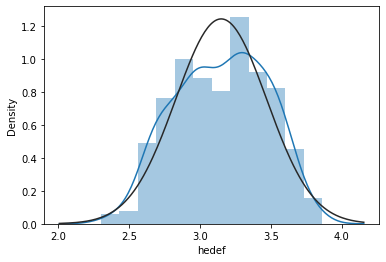

In [88]:
# buraya kod yazacağız
plt.figure()
sns.distplot(veri.hedef, fit = norm)
plt.show()

* Şekilde görüldüğü gibi hedef değişkeninde bulunan çarpıklık düzelerek, hedef değişkenin dağılımı normal dağılıma yaklaşmış.

In [89]:
# buraya kod yazacağız
# çarpıklığı düzeltilmiş hedef değişkenimiz için mu ve sigma değerlerini hesaplayalım
(mu, sigma) = norm.fit(veri["hedef"])
print("mu: {}, sigma: {}".format(mu,sigma))

mu: 3.150194394612899, sigma: 0.32111064266913925


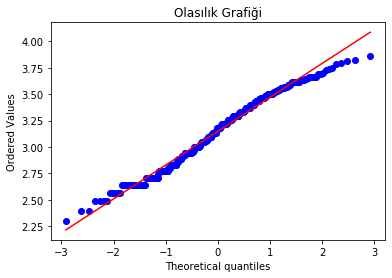

In [90]:
# buraya kod yazacağız
# qq-grafiği
plt.figure()
stats.probplot(veri["hedef"], plot = plt)
plt.title("Olasılık Grafiği")
plt.show()

In [91]:
# buraya kod yazacağız
# veri seti içerisinde bulunan diğer verilerin çarpıklıklarını kontrol edelim
carpik_ozellikler = veri.apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
carpiklik = pd.DataFrame(carpik_ozellikler, columns = ["çarpık"])
carpiklik

,çarpık
beygir_gucu,0.997460
mensei,0.911679
motor_hacmi,0.695857
silindir,0.543555
agirlik,0.534367
ivme,0.190781
model_yil,0.005678
hedef,-0.127043


* Genelde, Eğiklik -1'den küçük veya 1'den büyükse, dağılım oldukça çarpıktır. 
* Çarpıklık -1 ile -0.5 arasında veya 0.5 ile 1 arasında ise dağılım orta derecede çarpıktır. 
* Çarpıklık -0,5 ile 0,5 arasındaysa dağılım yaklaşık olarak simetriktir.
* Bizim veri setimizde beygir gucu ve mensei orta derece çarpık olarak adlandırılabilir.

<a id="706"></a> <br>
### Öz Nitelik Mühendisliği - Kodlama
* Veri içerisinde bulunan silindir ve mensei özelliklerini kategorik hale getirelim.

In [92]:
# buraya kod yazacağız
veri["silindir"] = veri["silindir"].astype(str)

In [93]:
# buraya kod yazacağız
veri["mensei"] = veri["mensei"].astype(str)

In [94]:
# buraya kod yazacağız
veri = pd.get_dummies(veri)

<a id="707"></a> <br>
### Ön İşlem
* Veri setini eğitebilmek için x(bağımsız değişkenler) ve y(hedef) olmak üzere ikiye ayıralım.
* Eğitim ve test bölünmesi yapalım
* Veriyi eğitim verisine göre standardize edelim.

In [95]:
# buraya kod yazacağız
# x ve y bölütlemesi
x = veri.drop(["hedef"], axis = 1)
y = veri.hedef

In [96]:
# buraya kod yazacağız
# eğitim - test bölütlemesi
X_egitim, X_test, Y_egitim, Y_test = train_test_split(x,y,test_size=0.9,random_state=42)

In [97]:
# buraya kod yazacağız
# Standardizasyon
scaler = RobustScaler() # RobustScaler veya StandardScaler
X_egitim = scaler.fit_transform(X_egitim)
X_test = scaler.transform(X_test)

<a id="708"></a> <br>
### Doğrusal Regresyon

In [99]:
# buraya kod yazacağız
# doğrusal regresyon
lr = LinearRegression()
Y_egitim.dropna(inplace=True) # eğer hata çıkarsa
lr.fit(X_egitim, Y_egitim)
print("Doğrusal regresyon katsayıları: ",lr.coef_)
y_predicted_dummy = lr.predict(X_test)
mse_dogrusal = mean_squared_error(Y_test, y_predicted_dummy)
print("Doğrusal regresyon ortalama kare hatası: ",mse_dogrusal)

Doğrusal regresyon katsayıları:  [-5.58652909e-02 -2.87837159e-02 -2.10096670e-01 -1.13047085e-02
  2.29850000e-01  8.32667268e-17  3.77613168e-02 -1.32634348e-01
  1.02971722e-02  8.45758588e-02 -4.84990453e-02  8.73749904e-02
 -3.88759451e-02]
Doğrusal regresyon ortalama kare hatası:  0.01555224014236325


<a id="709"></a> <br>
### Ridge Regression
* Ridge regresyon, sapmalı tahmin yöntemlerinden biridir. 
* Çoklu doğrusal bağlılık olduğunda en küçük kareler tahmincilerinin varyanslarından daha küçük varyanslı tahminler verdiğinden tercih edilebilir. 
* Kullanılması ile tüm değişkenlere modelde yer verme imkânı olabilmektedir.

Ridge Katsayıları:  [-0.04472386 -0.05225204 -0.17185379 -0.02372856  0.21072394  0.
  0.05817803 -0.09942096 -0.00565349  0.04689642 -0.04386739  0.07386511
 -0.02999772]
Ridge en iyi tahminleyici:  Ridge(alpha=0.31622776601683794, copy_X=True, fit_intercept=True,
      max_iter=10000, normalize=False, random_state=42, solver='auto',
      tol=0.001)
Ridge ortalama kare hata:  0.014551498448316267
-------------------------------------------------


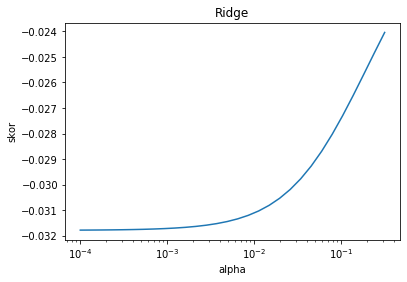

In [100]:
# buraya kod yazacağız
ridge = Ridge(random_state=42, max_iter = 10000)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha':alphas}]
n_folds = 5

clf = GridSearchCV(ridge, tuned_parameters, cv = n_folds, scoring = "neg_mean_squared_error", refit = True)
clf.fit(X_egitim, Y_egitim)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]

print("Ridge Katsayıları: ",clf.best_estimator_.coef_)
ridge = clf.best_estimator_
print("Ridge en iyi tahminleyici: ", ridge)

y_predicted_dummy = clf.predict(X_test)
mse_ridge = mean_squared_error(Y_test, y_predicted_dummy)
print("Ridge ortalama kare hata: ",mse_ridge)
print("-------------------------------------------------")

plt.figure()
plt.semilogx(alphas, scores)
plt.xlabel("alpha")
plt.ylabel("skor")
plt.title("Ridge")
plt.show()

<a id="710"></a> <br>
### Lasso Regression
* Makine öğreniminde, ürettiği istatistiksel modelin tahmin doğruluğunu ve yorumlanabilirliğini arttırmak için hem değişken seçimi hem de düzenlemeyi gerçekleştiren bir regresyon analiz yöntemidir.

Lasso Katsayıları:  [-0.         -0.01220008 -0.2273529  -0.          0.19044799  0.
  0.07123682 -0.         -0.          0.         -0.02476754  0.0541475
 -0.        ]
Lasso en iyi tahminleyici:  Lasso(alpha=0.006461670787466976, copy_X=True, fit_intercept=True,
      max_iter=10000, normalize=False, positive=False, precompute=False,
      random_state=42, selection='cyclic', tol=0.0001, warm_start=False)
Lasso ortalama kare hata:  0.013628383817530117
-------------------------------------------------


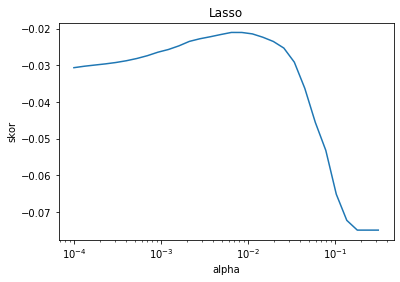

In [101]:
# buraya kod yazacağız
lasso = Lasso(random_state=42, max_iter = 10000)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha':alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv = n_folds, scoring = "neg_mean_squared_error", refit = True)
clf.fit(X_egitim, Y_egitim)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]

print("Lasso Katsayıları: ",clf.best_estimator_.coef_)
lasso = clf.best_estimator_
print("Lasso en iyi tahminleyici: ", lasso)

y_predicted_dummy = clf.predict(X_test)
mse_lasso = mean_squared_error(Y_test, y_predicted_dummy)
print("Lasso ortalama kare hata: ",mse_lasso)
print("-------------------------------------------------")

plt.figure()
plt.semilogx(alphas, scores)
plt.xlabel("alpha")
plt.ylabel("skor")
plt.title("Lasso")
plt.show()

<a id="711"></a> <br>
### Elastik Ağ
* Makine öğrenmesinde, elastik ağ, lasso ve ridge yöntemlerinin L₁ ve L₂ cezalarını doğrusal olarak birleştiren düzenli bir regresyon yöntemidir.

In [102]:
# buraya kod yazacağız
parametersGrid = {"alpha": alphas,
                  "l1_ratio" : np.arange(0.0, 1.0, 0.05)}
eNet = ElasticNet(random_state=42, max_iter = 10000)
clf = GridSearchCV(eNet, parametersGrid, cv=n_folds, scoring='neg_mean_squared_error', refit = True)
clf.fit(X_egitim, Y_egitim)

print("Elastik Ağ Katsayıları: ", clf.best_estimator_.coef_)
print("Elastik Ağ En İyi Tahminleyici: ", clf.best_estimator_)

y_predicted_dummy = clf.predict(X_test)
mse_elastik = mean_squared_error(Y_test, y_predicted_dummy)
print("Elastik Ağ Ortalama Kare Hata: ", mse_elastik)

Elastik Ağ Katsayıları:  [-0.05480764 -0.07277349 -0.1098435  -0.02978964  0.15249021  0.
  0.07196083 -0.00607086 -0.01605307  0.         -0.03491925  0.03208575
  0.        ]
Elastik Ağ En İyi Tahminleyici:  ElasticNet(alpha=0.05968456995122311, copy_X=True, fit_intercept=True,
           l1_ratio=0.05, max_iter=10000, normalize=False, positive=False,
           precompute=False, random_state=42, selection='cyclic', tol=0.0001,
           warm_start=False)
Elastik Ağ Ortalama Kare Hata:  0.014023527537640586


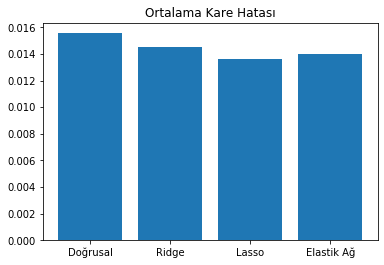

In [103]:
# buraya kod yazacağız
langs = ['Doğrusal', 'Ridge', 'Lasso', 'Elastik Ağ']
students = [mse_dogrusal, mse_ridge, mse_lasso, mse_elastik]
plt.bar(langs, students)
plt.title("Ortalama Kare Hatası")
plt.show()

<a id="800"></a> <br>
## Meyve ve Sebze Sınıflandırma
* Günümüzde yapay zeka teknolojileri, tarım alanında daha sağlıklı mahsuller üretmeye, zararlıları kontrol etmeye, toprağı ve yetiştirme koşullarını izlemeye, çiftçiler için verileri düzenlemeye, iş yüküne yardımcı olmaya ve tüm gıda tedarik zincirinde tarımla ilgili çok çeşitli görevleri iyileştirmeye olanak sağlıyor.
* Ürün tanımanın önemli adımlarından olan meyve ve sebze sınıflandırma problemini birlikte ele alacağız. 

<a id="801"></a> <br>
### Veri Seti ve Problem Tanımı
* Meyve ve sebzenin sınıflandırılması problemini evrişimsel sinir ağları kullanarak çözeceğiz.
* Veri seti içerisinde 95 farklı meyve ve sebze sınıfı bulunmaktadır. Örneğin, elma, muz, kivi ve soğan gibi.
* Veri seti görüntülerden oluşmaktadır. 100x100 piksel
* Bu projede kullanılan veri seti için referans:
    * Horea Muresan, Mihai Oltean, Fruit recognition from images using deep learning, Acta Univ. Sapientiae, Informatica Vol. 10, Issue 1, pp. 26-42, 2018.

In [104]:
# buraya kod yazacağız
# kütüphaneler
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
from glob import glob

In [105]:
# buraya kod yazacağız
# verinin bulunduğu dosya yolları
egitim_yolu = "fruits-360/Training/"
test_yolu = "fruits-360/Test/"

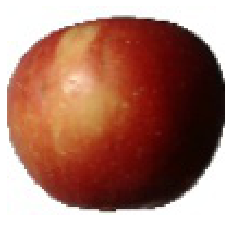

In [106]:
# buraya kod yazacağız
# resimleri eğitim esnasında yükleyeceğiz, şu an hepsini yüklemek çok vakit
# alacağından bir tane örnek görselleştirme yapalım
resim = load_img(egitim_yolu + "Apple Braeburn/0_100.jpg")
plt.figure()
plt.imshow(resim)
plt.axis("off")
plt.show()

In [107]:
# buraya kod yazacağız
# resimlerin şekillerine bakabilmek için resimleri array'e çevirelim
x = img_to_array(resim)
print("Resimlerin şekli: ",x.shape)

Resimlerin şekli:  (100, 100, 3)


In [108]:
# buraya kod yazacağız
# veri setinde bulunan sınıf sayısı
sinif_ismi = glob(egitim_yolu + '/*')
sinif_sayisi = len(sinif_ismi)
print("Eşsiz sınıf sayısı: ",sinif_sayisi)

Eşsiz sınıf sayısı:  95


<a id="802"></a> <br>
### Evrişimsel Sinir Ağı Modeli
* Evrişimsel sinir ağının özellik çıkartma bölümünü oluştururken evrişim katmanları, piksel ekleme katmanları ve relu aktivasyon fonksiyonları kullanacağız.
* Evrişimsel sinir ağının sınıflandırma bölümünde ise 1 adet gizli katman, seyreltme yöntemleri ve softmax aktivasyon fonksiyonundan oluşan çıktı katmanı kullanacağız.
* Maliyet hesabı yaparken kategorik çapraz entropi maliyet fonksiyonunu, optimizasyon fonksiyonu olarak rmsprop yöntemini ve model değerlendirme metriği olarak da doğruluğu kullanacağız.

In [109]:
# buraya kod yazacağız
# modelin tabanını oluşturalım
model = Sequential()
# özellik çıkarma bölümü
model.add(Conv2D(32,(3,3),input_shape = x.shape)) # evrişim katmanı
model.add(Activation("relu")) # relu aktivasyonu
model.add(MaxPooling2D()) # piksel ekleme katmanı

model.add(Conv2D(32,(3,3))) # evrişim katmanı
model.add(Activation("relu")) # relu aktivasyonu
model.add(MaxPooling2D()) # piksel ekleme katmanı

model.add(Conv2D(64,(3,3))) # evrişim katmanı
model.add(Activation("relu")) # relu aktivasyonu
model.add(MaxPooling2D()) # piksel ekleme katmanı

# sınıflandırma bölümü
model.add(Flatten()) # düzleştirme
model.add(Dense(1024)) # gizli katman 1024 sinir hücresi
model.add(Activation("relu")) # relu aktivasyonu
model.add(Dropout(0.5)) # seyreltme
model.add(Dense(sinif_sayisi)) # output
model.add(Activation("softmax")) # softmax fonksiyonu - multi sınıflar için

In [110]:
# buraya kod yazacağız
model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

<a id="803"></a> <br>
### Eğitim ve Test
* Eğtimi boyunca 50 iterasyon yapıp, batch boyutunu 32 olarak alacağız.
* Eğitim verisini resim oluşturucu ile değiştireceğiz.

In [111]:
# buraya kod yazacağız
batch_size = 32

In [112]:
# buraya kod yazacağız
# resim oluşturucu
train_datagen = ImageDataGenerator(rescale= 1./255,
                    shear_range = 0.3,
                    horizontal_flip=True,
                    zoom_range = 0.3)

In [113]:
# buraya kod yazacağız
# resimleri normalize edelim
test_datagen = ImageDataGenerator(rescale= 1./255)

In [114]:
# buraya kod yazacağız
# eğitim verisi oluşturalım
train_generator = train_datagen.flow_from_directory(
        egitim_yolu,
        target_size=x.shape[:2],
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 48905 images belonging to 95 classes.


In [115]:
# buraya kod yazacağız
# test verisi oluşturalım
test_generator = test_datagen.flow_from_directory(
        test_yolu, 
        target_size=x.shape[:2],
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 16421 images belonging to 95 classes.


In [116]:
# buraya kod yazacağız
tarih = model.fit_generator(
        generator = train_generator,
        steps_per_epoch = 1600 // batch_size,
        epochs=50,
        validation_data = test_generator,
        validation_steps = 800 // batch_size)

Epoch 1/50
50/50 [==============================] - 76s 2s/step - loss: 4.3220 - accuracy: 0.0544 - val_loss: 3.5152 - val_accuracy: 0.1325
Epoch 2/50
50/50 [==============================] - 71s 1s/step - loss: 3.3148 - accuracy: 0.1400 - val_loss: 2.3461 - val_accuracy: 0.2775
Epoch 3/50
50/50 [==============================] - 65s 1s/step - loss: 2.5768 - accuracy: 0.2663 - val_loss: 1.6881 - val_accuracy: 0.5038
Epoch 4/50
50/50 [==============================] - 64s 1s/step - loss: 2.1369 - accuracy: 0.3779 - val_loss: 1.9850 - val_accuracy: 0.4538
Epoch 5/50
50/50 [==============================] - 69s 1s/step - loss: 1.6349 - accuracy: 0.4988 - val_loss: 1.5109 - val_accuracy: 0.4525
Epoch 6/50
50/50 [==============================] - 55s 1s/step - loss: 1.3879 - accuracy: 0.5650 - val_loss: 0.5643 - val_accuracy: 0.8188
Epoch 7/50
50/50 [==============================] - 63s 1s/step - loss: 1.1905 - accuracy: 0.6350 - val_loss: 1.1152 - val_accuracy: 0.7150
Epoch 8/50
50/50 [==

<a id="804"></a> <br>
### Sonuçların Değerlendirilmesi
* Sonuçları değerlendirirken her zaman yaptığımız gibi maliyet ve doğruluk değişimlerini inceleyeceğiz.

In [117]:
# buraya kod yazacağız
# tarih içerisinde bulunan anahtar kelimelere bakalım
print(tarih.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


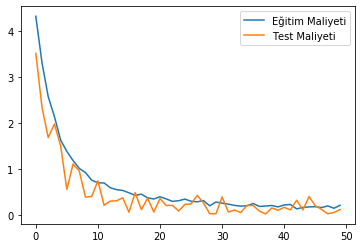

In [118]:
# buraya kod yazacağız
# Maliyeti görselleştirelim
plt.plot(tarih.history["loss"], label = "Eğitim Maliyeti")
plt.plot(tarih.history["val_loss"], label = "Test Maliyeti")
plt.legend()
plt.show()

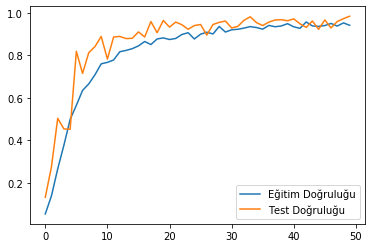

In [119]:
# buraya kod yazacağız
# doğrulukları görselleştirelim
plt.plot(tarih.history["accuracy"], label = "Eğitim Doğruluğu")
plt.plot(tarih.history["val_accuracy"], label = "Test Doğruluğu")
plt.legend()
plt.show()

# Sonuç
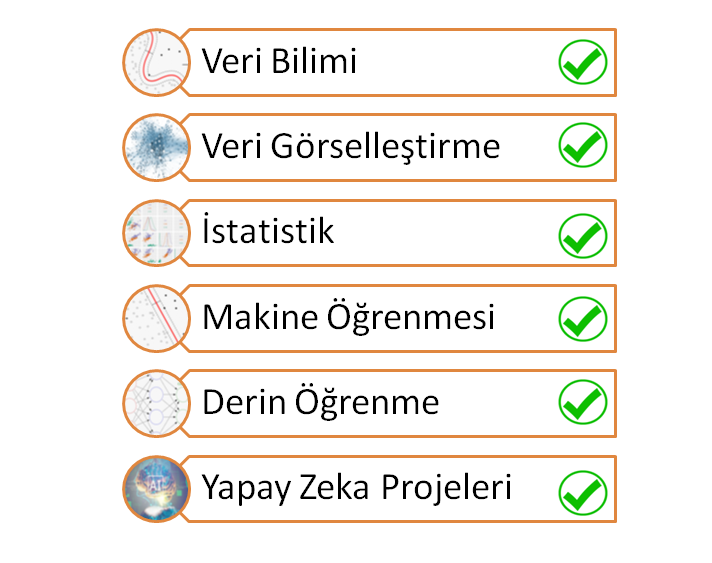